# Grade: /100 pts

# Assignment 06: Regularization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question 1: Preprocessing (5 pts)
**Make sure to only use the imports included in the first cell. Any additional imports used will result in 0.** <br>
Tasks:
* Load the data present in 'footballer_small.csv' using the pandas library and store the loaded data in a dataframe
* Drop the variables: 'ID','club','club_logo','flag', 'nationality','photo','potential', 'birth_date'
* Dummy code the variables: work_rate_att, work_rate_def, preferred_foot. **Because we are running a regularized model, we do not want to drop the first column**
* Get a test data set of size 500 - to make results comparable to solutions, set random_state = 0 <br>

In [3]:
df = pd.read_csv('footballer_small.csv')
df = df.drop(columns=['ID', 'club', 'club_logo', 'birth_date', 'flag', 'nationality', 'photo', 'potential'])
df = pd.get_dummies(df,columns=['work_rate_att','work_rate_def','preferred_foot'], drop_first=False)
df = df.astype(int)
train_data, test_data = train_test_split(df, test_size=500, random_state=0)
df.head(5)

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_High,work_rate_att_Low,work_rate_att_Medium,work_rate_def_High,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Left,preferred_foot_Right
0,29,186,82,68,70,50,56,61,66,74,1,2,3,58,44,65,59,49,56,48,42,58,68,64,74,66,62,59,59,80,73,76,51,70,64,43,52,69,65,63,70,0,0,1,0,0,1,0,1
1,21,194,87,59,61,57,53,61,45,54,1,1,2,15,19,15,25,13,16,16,15,19,18,48,42,40,57,33,20,44,39,56,14,25,23,12,26,22,22,15,16,0,0,1,0,0,1,0,1
2,23,175,72,65,85,28,55,62,60,68,1,2,2,60,22,54,58,24,59,30,35,57,62,88,83,70,53,75,43,73,79,65,24,58,52,48,55,31,34,60,67,0,0,1,1,0,0,0,1
3,26,185,80,73,76,54,67,73,69,78,1,2,3,76,41,60,64,52,75,59,40,73,73,73,78,67,68,63,65,70,87,79,74,67,75,68,68,38,66,66,69,0,0,1,0,0,1,0,1
4,19,182,76,48,47,46,51,50,39,47,1,1,2,14,11,13,26,12,14,11,11,22,15,37,41,33,45,43,18,56,28,49,12,18,12,12,25,16,38,12,12,0,0,1,0,0,1,0,1


## Question 2: Building the pipeline that preprocesses the data (10 pts)
In order to properly build the regression model, the features need to be standardized so that no feature can dominate others in determining the prediction values due to differences in feature scales. Build the pipeline that preprocesses the feature columns of the training data and create a linear regression model. Plot the data before and after the standardization for the stamina feature. <br>
In this question, there is no need to overwrite the training set's values. Create a new variable to include the standardized data. The original training data is needed for future exercises. <br>
### Question
Make observations about the plot.  

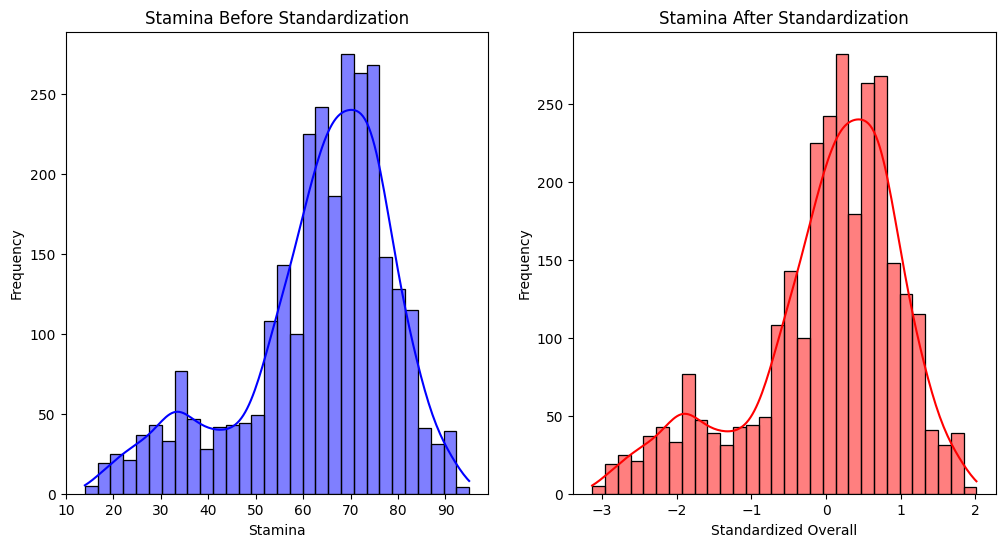

In [4]:
model = Pipeline([
    ('sscaler', StandardScaler()),
    ('ridge', Ridge())
])

ytrain = train_data['stamina']
Xtrain = train_data.drop(columns=['stamina'])

model.fit(Xtrain, ytrain)

sscaler = StandardScaler()
stam_before = ytrain
stam_after = sscaler.fit_transform(ytrain.values.reshape(-1,1)).flatten()

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.histplot(stam_before, bins=30, color='blue', kde=True)
plt.title('Stamina Before Standardization')
plt.xlabel('Stamina')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(stam_after, bins=30, color='red', kde=True)
plt.title('Stamina After Standardization')
plt.xlabel('Standardized Overall')
plt.ylabel('Frequency')

plt.show()

Observations: Both graphs look extremely similar, however, the stamina values are reduced to a range between -3 and +4 after standardization.

## Question 3: Creating a Complex feature model using 2-nd Polynomial features (10 pts)
In this task, the training data consists of the quadratic terms and 2-way interactions of all features except one of standing_tackle, composure, and marking variable. <br> 
Create <b> four </b> different training sets:
* The first training set includes the quadratic terms and 2-way interactions of all the features. 
* The second/third/fourth training sets include all the features, their quadratic terms, and their 2-way interactions except the standing_tackle/composure/marking features. <br>

#### Hint: 
For the 2nd/3rd and 4th training sets, create the training sets without the aforementioned features and then apply polynomial expansion to the resultant sets. 
### Questions:
* How many linear terms are in each of the new feature set?
* How many squared terms are in each of the new feature set?
* How many interaction terms are in each of the new feature set? Give an example of one of the interaction terms. 

In [5]:
polynomial = sk.preprocessing.PolynomialFeatures(degree=2)

XtrainOne = polynomial.fit_transform(Xtrain)
XtrainTwo = polynomial.fit_transform(Xtrain.drop(columns=['standing_tackle']))
XtrainThree = polynomial.fit_transform(Xtrain.drop(columns=['composure']))
XtrainFour = polynomial.fit_transform(Xtrain.drop(columns=['marking']))

print(f"Training 1 Shape: {XtrainOne.shape}\nTraining 2 Shape: {XtrainTwo.shape}\nTraining 3 Shape: {XtrainThree.shape}\nTraining 4 Shape: {XtrainFour.shape}")

Training 1 Shape: (2500, 1225)
Training 2 Shape: (2500, 1176)
Training 3 Shape: (2500, 1176)
Training 4 Shape: (2500, 1176)


Training Set 1 has 1225 linear terms, 1225 squared terms, and 749700 interaction terms.
Training Set 2, 3 and 4 has 1176 linear terms, 1176 squared terms, and 690900 interaction terms.

## Question 4: Evaluating the backward feature search (15 pts)
In this question, you have to use the pipeline created in question 2 and apply it to each of the training sets created in question 3. Use 10-fold cross validation to report the validation error on the training set using mean squared error as the metric. <br>
Show all the steps of the process and compare and analyze the results using the validation error reported. 

In [6]:
model.fit(XtrainOne,ytrain)
cvscores = cross_val_score(model, XtrainOne, ytrain, cv=10, scoring='neg_mean_squared_error')
mseOne = np.mean(-cvscores)
print(f"Mean MSE Training Set 1: {mseOne}")
# baseline mean because no variables excluded

model.fit(XtrainTwo,ytrain)
cvscores = cross_val_score(model, XtrainTwo, ytrain, cv=10, scoring='neg_mean_squared_error')
mseTwo = np.mean(-cvscores)
print(f"Mean MSE Training Set 2: {mseTwo}")
# since the error is slightly reduced from excluding standing_tackle, it may have some outliers or noise that increases the error when included

model.fit(XtrainThree,ytrain)
cvscores = cross_val_score(model, XtrainThree, ytrain, cv=10, scoring='neg_mean_squared_error')
mseThree = np.mean(-cvscores)
print(f"Mean MSE Training Set 3: {mseThree}")
# the error is greatly increased by excluding composure, implying it has less outliers and noise that positively affects the data, so when it is removed, there is more noise left in the data.

model.fit(XtrainFour,ytrain)
cvscores = cross_val_score(model, XtrainFour, ytrain, cv=10, scoring='neg_mean_squared_error')
mseFour = np.mean(-cvscores)
print(f"Mean MSE Training Set 4: {mseFour}")
# the error is slightly increased by removing marking, implying that like composure, marking has less outliers and noise, so by removing this data, more outliers and noise are left in the data, increasing the error value.

Mean MSE Training Set 1: 9.107689599898176
Mean MSE Training Set 2: 9.05510655670697
Mean MSE Training Set 3: 8.909526330387944
Mean MSE Training Set 4: 9.044998006011081


## Question 5: Applying Ridge Regression (10 pts)
Build a pipeline that performs scaling and fits the ridge regression on the data that includes the polynomial expansion of all the features. The penalization parameter is set to 0.5. Use the pipeline to report the validation error using mean square error metric. Use 10-fold cross validation. 

In [7]:
model2 = Pipeline([
    ('sscaler', StandardScaler()),
    ('ridge', Ridge(alpha=0.5))
])

mse = cross_val_score(model2, XtrainOne, ytrain, cv=10, scoring='neg_mean_squared_error')
meanMSE_m2 = np.mean(-mse)
print(f"Mean MSE Model 2: {meanMSE_m2}")

Mean MSE Model 2: 9.542268277100867


## Question 6: Tune the Ridge coefficient for the 2nd-order model   (15 pts)
Now use 10-fold CV on the training set to determine a good setting for the regularization coefficient. Perform the search going from $\lambda = \exp(-8), \cdots, \exp(6)$ in 15 evenly spaced increments on the log scale. Plot the mean squared error as a function of $\log(\lambda)$. 

### Questions: 

What is the best regularization parameter (actual not approximate)? 

Why does the error increase as $\lambda \rightarrow 0?$  Why does the error increase when $\lambda \rightarrow \infty$?  Answer in terms of the bias variance trade off.

Best Regularization Parameter: 1.0
Lowest MSE: 9.107689599898176


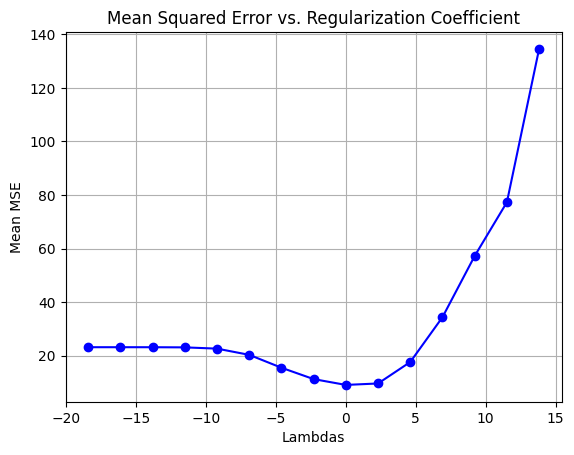

In [8]:
lambs = np.logspace(-8,6,15)
meanMseList = []
minMSE=30

for lam in lambs:
    model3 = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=lam))
    ])
    mse = cross_val_score(model3, XtrainOne, ytrain, cv=10, scoring='neg_mean_squared_error')
    mMSE_m2 = np.mean(-mse)
    meanMseList.append(mMSE_m2)


oLam_in = np.argmin(meanMseList)
oLam = lambs[oLam_in]
oMSE = meanMseList[oLam_in]
print(f"Best Regularization Parameter: {oLam}\nLowest MSE: {oMSE}")

plt.plot(np.log(lambs), meanMseList, marker='o', color='b')
plt.xlabel("Lambdas")
plt.ylabel('Mean MSE')
plt.title('Mean Squared Error vs. Regularization Coefficient')
plt.grid(True)
plt.show()


Error increases as lambda approaches 0 because there is minimal regularization, resulting in potential overcomplication, high sensitivity and overfitting that then increases the error. 
Error also increases as lambda approaches infinity because of oversimplification, reduced sensitivity and underfitting.

### Question 7: Test error  (10 pts)
Now test how the ridge model, fitted to the whole training set, performs on the test data set. 


Report the following:

* The mean squared error on the test data - along with the 95% confidence interval, determined with the central limit theorem. 
* The proportion of the variance explained by your model - along wth a 95% confidence interval.

In [9]:
model4 = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=oLam))
    ])

x_train, x_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=500, random_state=0)

model4.fit(Xtrain, ytrain)
yp = model4.predict(x_test)
mse_test = mean_squared_error(y_test, yp)

n = len(yp)
mse_std = np.std((yp-y_test) **2 )
mse_ci = 1.96 * (mse_std / np.sqrt(n))

lbound_mse = mse_test - mse_ci
ubound_mse = mse_test + mse_ci

rss = np.sum((y_test-yp) ** 2)
tss = np.sum((y_test-np.mean(y_test))**2)
r2 = 1-(rss/tss)

print(f"Test MSE: {mse_test}")
print(f"95% CI: [{lbound_mse}-{ubound_mse}]")
print(f"Proportion of Variance Explained (R2): {r2}")

Test MSE: 35.36300921181135
95% CI: [26.30250674408709-44.423511679535615]
Proportion of Variance Explained (R2): 0.8473076040395647


## Question 8: Analyzing Ridge Coefficients (15 pts)
In this question, you are first required to extract all the coefficients of the standing tackle, composure and marking features from the best model of question 7. After that, calculate the mean of the coefficients of the aforementioned features and analyze the results. Based on these observations, draw conclusions about the results in question 4. 

In [10]:
model4 = Ridge(alpha=oLam)
model4.fit(Xtrain, ytrain)

coefficients = model4.coef_
feature_names = Xtrain.columns
coeff_series = pd.Series(coefficients, index=feature_names)

features = ['standing_tackle', 'composure', 'marking']
feat_coeffs = coeff_series[features]
mean_coeff = feat_coeffs.mean()

print(f"Coefficients: \n{feat_coeffs}\nMean Coefficient: {mean_coeff}")

Coefficients: 
standing_tackle   -0.011578
composure          0.001633
marking            0.004394
dtype: float64
Mean Coefficient: -0.001850583603989301


All three individual coefficients are positive, indicating a direct relationship between the feature ('standing_tackle', 'composure', 'marking') and the target variable ('overall'). This means that when the feature value increases, the predicted value of 'overall' increases as well. Therefore, these features all have an effect on the value of 'overall', composure having the greatest effect, and marking having the weakest effect of the three features selected. The mean coefficient validates this as it also tells us that the three features selected have an effect on 'overall'. 

This is also reflected in Question 4 as we are able to see that composure (Training Set 3) has the strongest effect on 'overall'. As shown below, there is the greatest change between Training Set 1 (baseline) and 3 (composure exclusion), just as composure has the greatest coefficient. Similarly, standing_tackle and marking both have lower coefficients and weaker effects on the target feature reflected in the minimal change seen between Training Set 1 and Training Sets 2 (standing_tackle) and 4 (marking).

Mean MSE Training Set 1: 1.6370873307914717
Mean MSE Training Set 2: 1.6369343615359941
Mean MSE Training Set 3: 1.6501225186192063
Mean MSE Training Set 4: 1.638122658132853

## Question 9: Lasso Regression (10 pts)
Let us assume that you are building a linear regression model using only three features: standing tackle, marking, and composure to predict a player's overall rating. Based on the results of question 8, what do you think will be the features' coefficients while applying the lasso regression optimization? Answer in no more than 5 sentences. 

Lasso Regression uses L1 regularization which indicates coefficients will likely shrink towards 0 to promote sparsity. With the coefficients found in question 8 - 0.021192, 0.087116, 0.013017 - for standing_tackle, composure and marking, respectively, the smaller coefficients will likely be reduced closer to 0 or to 0 if their effects are minimal enough that they are not important for improving the model's prediction of a player's overall rating. On the other hand, composure - the feature with the largest coefficient - will likely remain relatively similar to its original value because it has the greatest effect on the 'overall' rating. 

## Note: 
After completing all the tasks and before submitting: 
* Restart you kernel by clicking 'Restart & Run all'
* Fix any errors resulting from the first step.
* Repeat the first two steps until no errors are encountered. 